<a href="https://colab.research.google.com/github/ruthmelese/eda/blob/main/gss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)

The topic of immigration has been a major point of discussion in recent U.S. politics with shifting policies and public sentiment influencing debates on work permits, crime, education, and employment. The evolving political landscape has sparked my interest about how opinions on immigration change over time. Discussions about crime and border security have been influenced by partisan narratives and the media has shaped public perceptions on this topic. I picked these datasets because I wanted to explore whether opinions on immigration issues have changed over time due to political influence and economic shifts.

3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving GSS.csv to GSS.csv


In [3]:
df = pd.read_csv('GSS.csv')

In [49]:
immigration_cols = ["undocwrk", "undoccol", "undockid", "immcrime", "immjobs"] #Only focus on the immigration-related variables
df[immigration_cols] = df[immigration_cols].map(lambda x: str(x).strip().lower()) #strip whitespace, lowercase everything
inapplicable_vals = [".i: inapplicable", "i: inapplicable", ".y: not available in this year"] #Define values that represent missing/inapplicable answers
df_cleaned = df[df[immigration_cols].apply(lambda row: (~row.isin(inapplicable_vals)).sum(), axis=1) >= 3].copy() #Keep only rows where at least 3 of the 5 immigration questions were answered



In [50]:
values_kids = df_cleaned["undockid"].unique()
values_edu = df_cleaned["undoccol"].unique()
values_work = df_cleaned["undocwrk"].unique()

print(values_kids)
print(values_edu)
print(values_work)

['.i:  inapplicable' 'no, not qualify' 'yes, qualify'
 '.d:  do not know/cannot choose' '.n:  no answer'
 '.y:  not available in this year']
['.i:  inapplicable' 'no, not entitled' 'yes, entitled'
 '.d:  do not know/cannot choose' '.n:  no answer'
 '.y:  not available in this year']
['.i:  inapplicable' 'no, not entitled' 'yes, entitled'
 '.d:  do not know/cannot choose' '.n:  no answer'
 '.y:  not available in this year']


In [51]:
df_cleaned.describe()

,year,id_
count,72390.000000,72390.000000
mean,1997.715541,1241.796395
std,15.109995,912.273245
min,1972.000000,1.000000
25%,1985.000000,534.000000
50%,1998.000000,1083.000000
75%,2010.000000,1722.000000
max,2022.000000,4510.000000


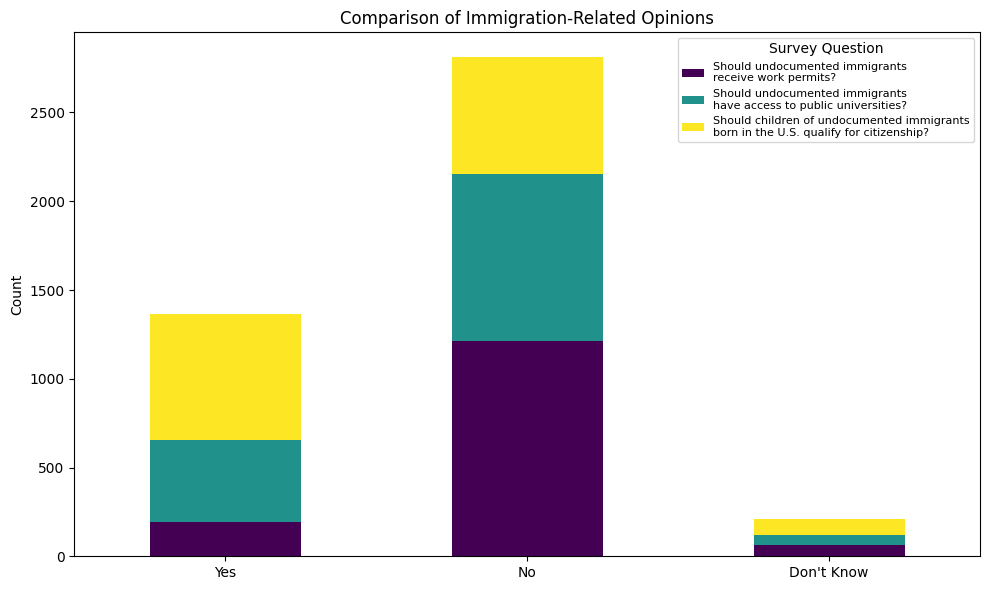

In [59]:
#Standardize responses for undocwrk and undoccol
for col in ['undocwrk', 'undoccol']:
    df_cleaned[col] = df_cleaned[col].replace({
        'yes, entitled': 'Yes',
        'no, not entitled': 'No',
        '.d:  do not know/cannot choose': "Don't Know"
    })

#Standardize responses for undockid
df_cleaned['undockid'] = df_cleaned['undockid'].replace({
    'yes, qualify': 'Yes',
    'no, not qualify': 'No',
    '.d:  do not know/cannot choose': "Don't Know"
})

#Define consistent response order
response_order = ["Yes", "No", "Don't Know"]

#Count and reindex
#df_cleaned['undocwrk'].value_counts(): Counts how many people gave each unique response to the undocwrk
#reindex reorders the results to match the way I want it to be presented on the graph
work = df_cleaned['undocwrk'].value_counts().reindex(response_order, fill_value=0)
college = df_cleaned['undoccol'].value_counts().reindex(response_order, fill_value=0)
citizen = df_cleaned['undockid'].value_counts().reindex(response_order, fill_value=0)

#Combine into DataFrame with renamed columns
stacked_data = pd.DataFrame({
    'Should undocumented immigrants\nreceive work permits?': work,
    'Should undocumented immigrants\nhave access to public universities?': college,
    'Should children of undocumented immigrants\nborn in the U.S. qualify for citizenship?': citizen
})

#Plotting code
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Comparison of Immigration-Related Opinions")
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=0)
plt.legend(title="Survey Question", fontsize=8, loc='upper right')
plt.tight_layout()
plt.show()


In [60]:
print(stacked_data)

            Should undocumented immigrants\nreceive work permits?  \
Yes                                                       192       
No                                                       1210       
Don't Know                                                 63       

            Should undocumented immigrants\nhave access to public universities?  \
Yes                                                       465                     
No                                                        942                     
Don't Know                                                 58                     

            Should children of undocumented immigrants\nborn in the U.S. qualify for citizenship?  
Yes                                                       706                                      
No                                                        659                                      
Don't Know                                                 88                             

This chart compares public opinion on three immigration-related questions. The majority of respondents answered “No” across all three issues, especially regarding work permits and access to public universities. However, a significant number supported citizenship for children born in the U.S. to undocumented immigrants.


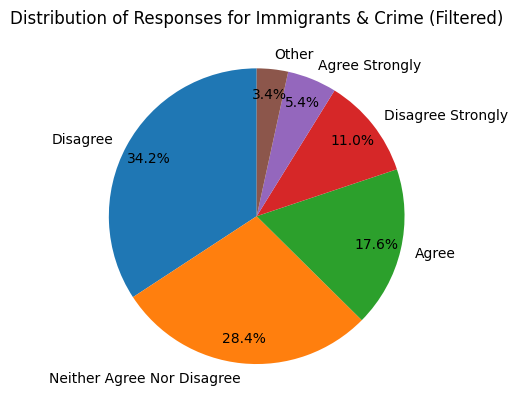

In [68]:
#Define unwanted values
unwanted_val = [".i:  inapplicable", ".y:  Not available in this year", ".n:  No answer", ".s:  Skipped on Web", ".d:  Do not Know/Cannot Choose"]

#Remove unwanted responses
clean_crime = df[~df["immcrime"].isin(unwanted_val)]

# Get value counts of remaining responses
immcrime_counts = clean_crime["immcrime"].value_counts()

#For loop for others categorythreshold = 0.05  # anything less than 5%
total = immcrime_counts.sum()
small_counts = immcrime_counts[immcrime_counts / total < threshold]
large_counts = immcrime_counts[immcrime_counts / total >= threshold]

# Add 'Other' if needed
if not small_counts.empty:
    large_counts["Other"] = small_counts.sum()

#Create pie chart

plt.pie(large_counts, labels=large_counts.index.str.title(), autopct='%1.1f%%', startangle=90, pctdistance=0.83)

plt.title("Distribution of Responses for Immigrants & Crime")
plt.show()


Most respondents disagreed (34.2%) or neither agreed nor disagreed (28.4%) with the idea that immigrants increase crime rates. Only 5.4% strongly agreed, indicating doubt in the links between crime and immigration.


<Figure size 1000x600 with 0 Axes>

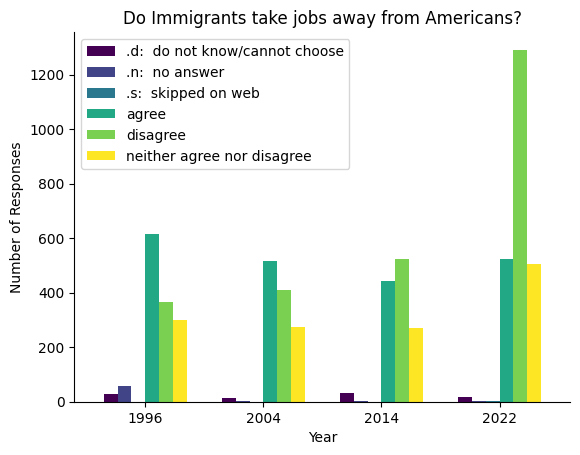

In [70]:
unwanted_val = [".i:  inapplicable", ".y:  Not available in this year", ".n:  No answer", ".s:  Skipped on Web", ".d:  Do not Know/Cannot Choose"]
clean_jobs = df[~df["immjobs"].isin(unwanted_val)].copy()
clean_jobs["immjobs"]= clean_jobs["immjobs"].replace("AGREE STRONGLY", "AGREE")
clean_jobs["immjobs"] = clean_jobs["immjobs"].replace("DISAGREE STRONGLY", "DISAGREE")

belief_counts = clean_jobs.groupby(["year", "immjobs"]).size().unstack()

plt.figure(figsize=(10, 6))
belief_counts.plot(kind="bar", stacked=False, colormap="viridis", width=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Plotting
plt.title("Do Immigrants take jobs away from Americans?")
plt.xlabel("Year")
plt.ylabel("Number of Responses")
plt.legend(title="")
plt.xticks(rotation=0)  # Keep year labels readable
plt.show()


Over time, public concern about immigrants taking American jobs has decreased. By 2022, disagreement rose strongly, suggesting a shift in public perception toward viewing immigrants as less of a threat to the job market.



Describing my findings:

The topic of immigration has recently become a central issue in U.S. politics. My analysis uses General Social Survey (GSS) data to explore how public opinion on immigration has evolved over time, focusing on themes like crime, education, employment, and legal status.

The first visualization compares responses to three questions about immigration policy. A majority of respondents opposed granting work permits or public university access to undocumented immigrants, though there was relatively more support for allowing their U.S.-born children to retain citizenship.

In the second visualization, opinions on the claim that "immigrants increase crime rates" were mixed, but the largest group of respondents disagreed. Only a small portion strongly agreed, which suggests that the stereotype linking immigrants to crime lacks strong public endorsement, even with the political rhetoric suggesting otherwise.

The third visualization tracks responses from 1996 to 2022 on whether immigrants "take jobs away from Americans." Over time, disagreement has grown significantly, especially in 2022 as it became the dominant response. This shift implies that economic concerns around immigration may be diminishing, which possibly reflects a changing economy and greater public awareness of the value immigrants bring to the workforce.

Contrary to my expectations, the data indicates more accepting views on immigration. While skepticism remains in areas such as legal status and access to benefits, responses related to crime and employment suggest a shift towards openness and reduced concern over perceived threats.